In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max

# 1. Реализуйте высокочастотную фильтрацию на основе ядра Гаусса

In [12]:
image = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT) # преобразование фурье
dft_shift = np.fft.fftshift(dft)

In [13]:
sigma = 30   
rows, cols = image.shape
x, y = np.meshgrid(np.arange(0, cols, 1), np.arange(0, rows, 1))
gauss_mask = np.exp(-((x - (cols // 2))**2 + (y - (rows // 2))**2) / (2 * sigma**2))
mask_res = 1 - gauss_mask

In [14]:
dft_shift = dft_shift * mask_res[:, :, np.newaxis] # применение маски - поэлем. умнож.
image_idft = cv.idft(np.fft.ifftshift(dft_shift)) # обратное преобр.фурье
image_idft = cv.magnitude(image_idft[:,:,0], image_idft[:,:,1])

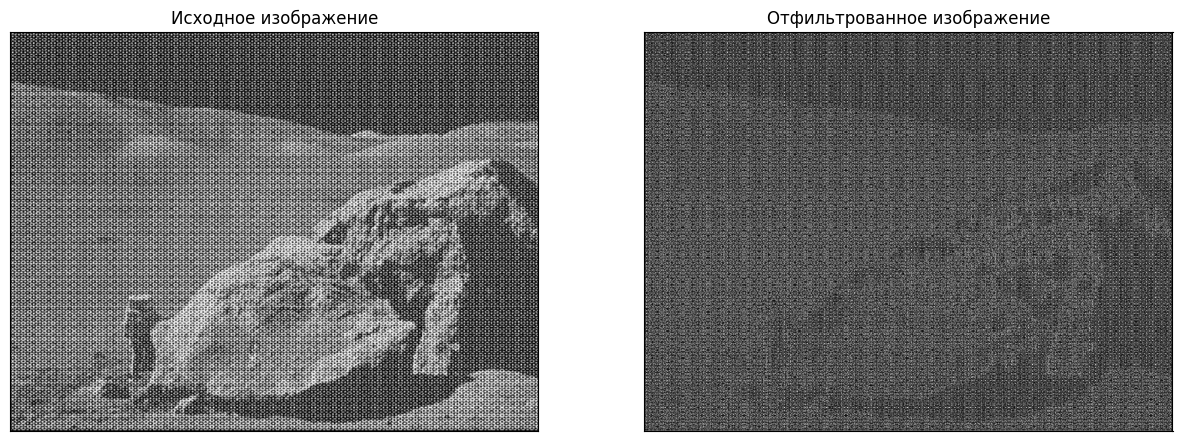

In [15]:
plt.figure(figsize = (15, 8))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_idft, cmap = 'gray')
plt.title('Отфильтрованное изображение'), plt.xticks([]), plt.yticks([])
plt.show()

# 2. Реализуйте удаление периодического шума

In [16]:
dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [17]:
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
local_maxm = peak_local_max(magnitude_spectrum, min_distance=15, threshold_abs=200)

In [18]:
rows, cols = image.shape
mask = np.copy(dft_shift)
mask[:, :, :] = 1
# создали заготовку маски и заполняем ее
for i in local_maxm:
    r = np.int32(((i[0]-rows//2)**2+(i[1]-cols//2)**2)**(1/2))
    cv.circle(mask, (rows//2, cols//2), r, (0,0))     

In [19]:
dft_shift = dft_shift * mask              
image_idft = cv.idft(np.fft.ifftshift(dft_shift))              
image_idft = cv.magnitude(image_idft[:,:,0], image_idft[:,:,1]) 

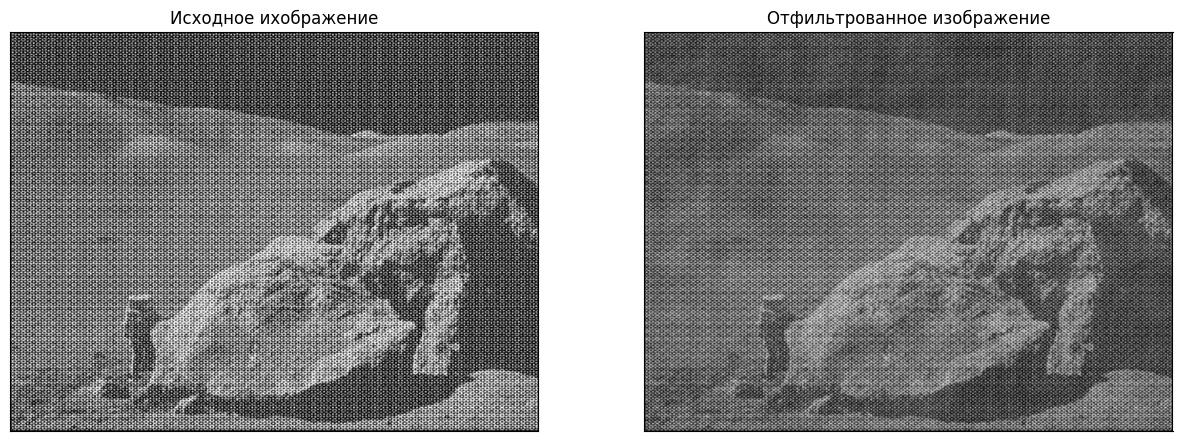

In [20]:
plt.figure(figsize = (15, 8))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Исходное ихображение'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_idft, cmap = 'gray')
plt.title('Отфильтрованное изображение'), plt.xticks([]), plt.yticks([])
plt.show()